In [7]:
# Importando bibliotecas
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from minisom import MiniSom

from pylab import pcolor, colorbar, plot

In [8]:
# Lendo dados
data = pd.read_csv("../Databases/wines.csv")

### Pre-processamento

In [9]:
# Separacao de features e label;
X = data.iloc[:, 1:14].values # features
y = data.iloc[:, 0].values # label

# Realizando normalizacao das features, para que estejam entre 0 e 1;
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

### Treinando Modelo

In [10]:
# Criando modelo;
mapSom = MiniSom(x=8,y=8, # Matriz de neuronios;
                 input_len=13, # Numero de entradas;
                 sigma=1.0, # Raio;
                 learning_rate=0.5, # Taxa de aprendizagem;
                 random_seed=42) # Semente aleatoria;

# Iniciando os pesos e realizando treinamento;
mapSom.random_weights_init(X) # Inicia os pessos dos neuronios;
mapSom.train_random(data=X, num_iteration = 500) # Treinamento;

In [11]:
# Pesos;
mapSom._weights

# Valores do mapa auto-organizavel
mapSom._activation_map

values_BMU = mapSom.activation_response(X)

### Visualizacao

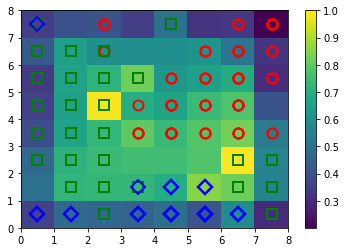

In [12]:
# Configurando dplotagem;
pcolor(mapSom.distance_map().T)
colorbar()

# DEfinindo cores e estilos de desenhos;
makers =['o','s','D'] 
color = ['r', 'g', 'b']

# Realizando preprocessamento para fazer o agrupamento;
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

# Desenhando mo grafico;
for i, x in enumerate(X):
    winner = mapSom.winner(x)
    plot(winner[0] + 0.5, winner[1] + 0.5, makers[y[i]],
            markerfacecolor = 'None', markersize=10,
            markeredgecolor= color[y[i]], markeredgewidth=2)
